## Net rotation

Plot Net Rotation for one (or more) optimised models and the un-optimised model.

In [1]:
import os.path


#model_dir = 'Global_Model_WD_Internal_Release_2019_v2'
model_dir = 'Global_1000-0_Model_2017'


if model_dir.startswith('Global_Model_WD_Internal_Release'):
    time_step = 1
    time_min = 1
    time_max = 410

    # Models to plot.
    net_rotation_infos = [
        #(os.path.join(model_dir, 'NR_NoOpt'), 'red', 'Not Optimized'),
        #(os.path.join(model_dir, 'NR_optAPM_run1_240-250adj'), 'darkorange', 'Optimized run1 (TM=1, NR=1;0.5) adjusted 240-250Ma'),
        #(os.path.join(model_dir, 'NR_optAPM_run2_240-250adj'), 'blue', 'Optimized run2 (TM=1, NR=1;0.1) adjusted 240-250Ma'),
        #(os.path.join(model_dir, 'NR_optAPM_run3_240-250adj'), 'green', 'Optimized run3 (TM=1, NR=1;0.2) adjusted 240-250Ma'),
        #(os.path.join(model_dir, 'NR_optAPM_run4_240-250adj'), 'magenta', 'Optimized run4 (TM=1, NR=1;0.3) adjusted 240-250Ma'),
        #(os.path.join(model_dir, 'NR_optAPM_run5_240-250adj'), 'cyan', 'Optimized run5 (TM=1, NR=0.5;0.5;0.2) adjusted 240-250M'),
        #(os.path.join(model_dir, 'NR_optAPM_run6_240-250adj'), 'brown', 'Optimized run6 (TM=1, NR=1;0.5;0.2) adjusted 240-250M'),
        (os.path.join(model_dir, 'NR_optAPM_run6_240-250adj'), 'red', 'Optimized (TM=1, NR=0.5,0.2): before NR bug fix'),
        (os.path.join(model_dir, 'NR_optAPM_run7_240-250adj'), 'blue', 'Optimized (TM=1, NR=0.5,0.2): after NR bug fix'),
        (os.path.join(model_dir, 'NR_optAPM_run7_old_tm_240-250adj'), 'green', 'Optimized (TM=1, NR=0.5,0.2): after NR bug fix, before TM fix'),
    ]
elif model_dir == 'Global_1000-0_Model_2017':
    time_step = 1
    time_min = 1
    time_max = 1000

    # Models to plot.
    net_rotation_infos = [
        (os.path.join(model_dir, 'NR_NoOpt'), 'red', 'Not Optimized'),
        (os.path.join(model_dir, 'NR_optAPM_run6'), 'darkorange', 'Optimized run6 (TM=1;0.5, NR=1)'),
        (os.path.join(model_dir, 'NR_optAPM_run7'), 'blue', 'Optimized run7 (TM=1;0.5, NR=1, PV=1)'),
    ]
else:
    time_step = 1
    time_min = 1
    time_max = 410

    # Models to plot.
    net_rotation_infos = []

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

import matplotlib as mpl
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.sans-serif'] = "arial"
mpl.rcParams['text.usetex'] == True


def get_last_line_from_GPlatesNR_output(filename):
    # read a text file as a list of lines
    # find the last line
    fileHandle = open (filename,"r" )
    lineList = fileHandle.readlines()
    fileHandle.close()
    
    # for the sake of trying to do everything in one line......
    return [float(i) for i in lineList[len(lineList)-1].strip('\n').split(',')]


def get_net_rotation_poles(basedir, time_list):
    net_rotation_poles = []

    for time in time_list:

        pole = get_last_line_from_GPlatesNR_output(os.path.join(basedir, 'net_rotation_%0.2fMa.csv' % time))
        net_rotation_poles.append(pole[2])
    
    return net_rotation_poles


def plot_net_rotation(net_rotation_infos, time_list, medfilt_kernel_sizes):
    
    # Gather the net rotation poles for all the net rotation sequences we want to plot.
    net_rotation_poles_list = []
    for basedir, color, label in net_rotation_infos:
        # Hack Global_1000-0_Model_2017 run6 since interrupted optimisation run at 850Ma (not 1000Ma).
        if model_dir == 'Global_1000-0_Model_2017' and label.startswith('Optimized run6'):
            net_rotation_poles_list.append(get_net_rotation_poles(basedir, np.arange(1,850,time_step)))
        else:
            net_rotation_poles_list.append(get_net_rotation_poles(basedir, time_list))

    for medfilt_kernel_size in medfilt_kernel_sizes:
        
        fig = plt.figure(figsize=(6,4))

        for net_rotation_index in range(len(net_rotation_infos)):
            net_rotation_poles = net_rotation_poles_list[net_rotation_index]
            basedir, color, label = net_rotation_infos[net_rotation_index]
            # Hack Global_1000-0_Model_2017 run6 since interrupted optimisation run at 850Ma (not 1000Ma).
            if model_dir == 'Global_1000-0_Model_2017' and label.startswith('Optimized run6'):
                plt.plot(np.arange(1,850,time_step), medfilt(net_rotation_poles, medfilt_kernel_size), color, label=label)
            else:
                plt.plot(time_list, medfilt(net_rotation_poles, medfilt_kernel_size), color, label=label)

        plt.xlim([0,time_max])
        plt.ylim([0,1.4])
        plt.xticks(np.arange(0, time_max+1, 50))
        plt.ylabel('Net Lithospheric Rotation (deg/Myr)', fontsize=12)
        plt.xlabel('Reconstruction Age (Myr)', fontsize=12)
        plt.grid(linestyle='--',alpha=0.5)

        plt.legend(fontsize=10)

        plt.savefig(
            os.path.join(model_dir, 'NLR_%dMy.pdf' % medfilt_kernel_size),
            format='pdf',
            dpi=600)

        plt.show()

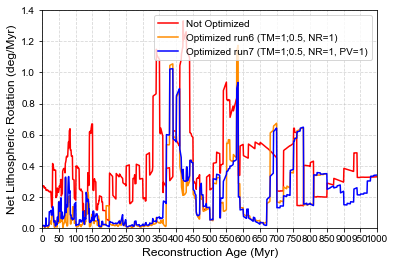

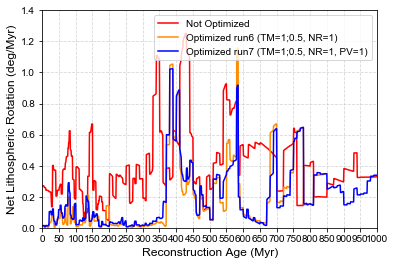

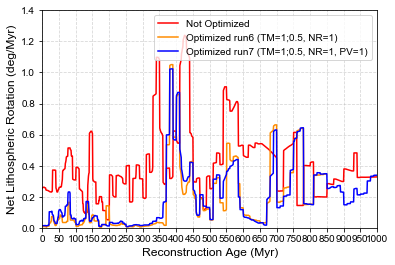

In [3]:
time_list = np.arange(1,time_max,time_step)


medfilt_kernel_sizes = [1, 5, 11]
#medfilt_kernel_sizes = [5]

plot_net_rotation(net_rotation_infos, time_list, medfilt_kernel_sizes)